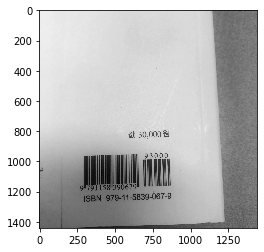

In [36]:
#꼭지점 정보 갖고 오기_pyzbar쓰는.ver
import pyzbar.pyzbar as pyzbar
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('ISBN_1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.imshow(gray,cmap='gray') #컬러맵을 gray scale로 바꿈

In [37]:
decoded = pyzbar.decode(gray)

decoded

[Decoded(data=b'9791158390679', type='EAN13', rect=Rect(left=297, top=963, width=362, height=186), polygon=[Point(x=297, y=967), Point(x=297, y=1149), Point(x=485, y=1148), Point(x=659, y=1144), Point(x=659, y=1122), Point(x=658, y=1066), Point(x=657, y=1012), Point(x=656, y=964), Point(x=298, y=963)])]

In [38]:
for d in decoded:
    print(d.data)

b'9791158390679'


In [39]:
isbn = d.data.decode()
isbn

'9791158390679'

In [40]:
import os
import sys
import urllib.request
client_id = "8D2K86C4CHALYlPkI6Jx"
client_secret = "DaMxMtHnrD"
encText = urllib.parse.quote(isbn)
url = "https://openapi.naver.com/v1/search/book?query=" + encText # json 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
"lastBuildDate": "Thu, 28 Nov 2019 01:46:47 +0900",
"total": 1,
"start": 1,
"display": 1,
"items": [
{
"title": "머신러닝, 딥러닝 실전 개발 입문 (파이썬을 이용한,웹 크롤링과 스크레이핑부터 머신러닝,딥러닝까지 체계적으로 배우기)",
"link": "http://book.naver.com/bookdb/book_detail.php?bid=12129887",
"image": "https://bookthumb-phinf.pstatic.net/cover/121/298/12129887.jpg?type=m1&udate=20191010",
"author": "쿠지라 히코우즈쿠에",
"price": "30000",
"discount": "27000",
"publisher": "위키북스",
"pubdate": "20170615",
"isbn": "115839067X <b>9791158390679</b>",
"description": "『파이썬을 이용한 머신러닝, 딥러닝 실전 개발 입문』에서는 머신러닝의 바탕이 되는 데이터를 수집하고, 수집된 데이터를 기반으로 머신러닝을 수행하는 방법을 설명합니다. 인터넷에서 데이터를 어떻게 효율적으로 수집하는지 알아보고, 머신러닝을 원활하게 할 수 있게끔 데이터를 가공하는 방법을... "

}
]
}

